In [1]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

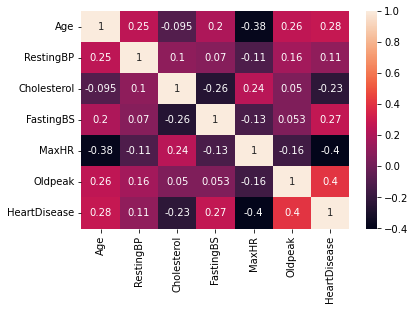

In [6]:
# Checking the corelation among the features

sns.heatmap(df.corr(), annot=True)

# Removing Outliers

In [7]:
df[df['Cholesterol']>(df['Cholesterol'].mean()+3*df['Cholesterol'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [8]:
df[df['Cholesterol']<(df['Cholesterol'].mean()-3*df['Cholesterol'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [9]:
df1 = df[df['Cholesterol']<=(df['Cholesterol'].mean()+3*df['Cholesterol'].std())]
df1.shape

(915, 12)

In [10]:
df[df['MaxHR']>(df['MaxHR'].mean()+3*df['MaxHR'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [11]:
df[df['FastingBS']>(df['FastingBS'].mean()+3*df['FastingBS'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [12]:
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [13]:
df[df['Oldpeak']>(df['Oldpeak'].mean()+3*df['Oldpeak'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [14]:
df2 = df1[df1['Oldpeak']<(df1['Oldpeak'].mean()+3*df1['Oldpeak'].std())]
df2.shape

(909, 12)

In [15]:
df2[df2['RestingBP']>(df2['RestingBP'].mean()+3*df2['RestingBP'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [16]:
df3 = df2[df2['RestingBP']<(df2['RestingBP'].mean()+3*df2['RestingBP'].std())]
df3.shape

(902, 12)

# Pre processing the data

In [17]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [18]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [19]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [20]:
dummies_df = pd.get_dummies(df['ChestPainType'], drop_first=True)
dummies_df

,ATA,NAP,TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0
...,...,...,...
913,0,0,1
914,0,0,0
915,0,0,0
916,1,0,0


In [21]:
df1 = pd.concat([df, dummies_df], axis=1)
df1.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0


In [22]:
le = LabelEncoder()

df1['new_RestingECG'] = le.fit_transform(df1['RestingECG'])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,new_RestingECG
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,1


In [23]:
df1['new_RestingECG'].unique()

array([1, 2, 0])

In [24]:
le1 = LabelEncoder()

df1['new_ExerciseAngina'] = le1.fit_transform(df1['ExerciseAngina'])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,new_RestingECG,new_ExerciseAngina
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0,2,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,1,0


In [25]:
le2 = LabelEncoder()

df1['new_ST_Slope'] = le2.fit_transform(df1['ST_Slope'])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,new_RestingECG,new_ExerciseAngina,new_ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,1,0,2


In [26]:
le3 = LabelEncoder()

df1['sex'] = le3.fit_transform(df1['Sex'])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,new_RestingECG,new_ExerciseAngina,new_ST_Slope,sex
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0,1,0,2,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0,2,0,2,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,1,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,1,0,2,1


In [27]:
df1.drop(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'], axis=1, inplace=True)

In [28]:
df1.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ATA,NAP,TA,new_RestingECG,new_ExerciseAngina,new_ST_Slope,sex
0,40,140,289,0,172,0.0,0,1,0,0,1,0,2,1
1,49,160,180,0,156,1.0,1,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,2,0,2,1


In [29]:
x = df1.drop('HeartDisease', axis=1)
y = df1['HeartDisease']

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.8235563 ,
         1.05211381,  0.51595242],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.8235563 ,
        -0.59607813, -1.93816322],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.8235563 ,
         1.05211381,  0.51595242],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  1.21424608,
        -0.59607813,  0.51595242],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.8235563 ,
        -0.59607813, -1.93816322],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.8235563 ,
         1.05211381,  0.51595242]])

# Training the Model: Using Ensemble learning,SVM,Decission Tree ,Grid searchCV(for Hyper-parameter tuning)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

In [32]:
X_train.shape

(734, 13)

In [33]:
X_test.shape

(184, 13)

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(), x, y, cv=5)
scores.mean()

0.6840520313613684

In [35]:
# Using Grid Search CV- Hyperparameter Tuning

params = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100], 
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
}

In [36]:
from sklearn.model_selection import GridSearchCV
GridSearch_svm = GridSearchCV(SVC(), params, cv=5)
GridSearch_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 10, 100]})

In [37]:
GridSearch_svm.best_score_

0.8719131488211722

In [38]:
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
scores.mean()

0.8024974373310968

In [39]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 100, # subgroups or models
    max_samples = 0.8,
    oob_score = True,
    random_state=101
)

In [41]:
scores = cross_val_score(bag_model, x, y, cv=5)
scores.mean()

0.7994891898313139

In [42]:
# RandomForestClassifier model

scores = cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv=5)
scores.mean()

0.8245545260156806

In [43]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [5, 25, 50]
}

rf = RandomForestClassifier()

rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [45]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 25, 50]})

In [46]:
rf_cv.best_score_

0.8773926008759668

In [47]:
rf_cv.score(X_test, y_test)

0.8315217391304348